# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
data = pd.read_csv('marketing_campaign - marketing_campaign.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Basic Data Preprocessing

In [3]:
data.shape

(2240, 29)

## Making A copy of Data

In [4]:
df = data.copy()

## Function To Find Null

In [5]:
def find_null(data):
    col = data.columns
    for c in col:
        if data[c].isnull().sum():
            print(c, "Has {} Null Value".format(data[c].isnull().sum()))

In [6]:
find_null(df)

Income Has 24 Null Value


In [7]:
df[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


## Replacing Null Value With Appropriate Mean Value

In [8]:
col_mean = df.groupby([df.Education]).Income.mean()
col_mean

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [9]:
const = {'2n Cycle': 47633,
            'Basic':20306,
            'Graduation':52720,
            'Master':52917,
            'PhD':56145}

In [10]:
for i in range(len(df)):
    if pd.isna(df.Income[i]):
        df.Income[i] = const[df.Education[i]]

## Finding Unique Value

In [11]:
col_name = df.columns
for i in col_name:
    print(i,'has:  ',df[i].nunique(),'Unique values')

ID has:   2240 Unique values
Year_Birth has:   59 Unique values
Education has:   5 Unique values
Marital_Status has:   8 Unique values
Income has:   1978 Unique values
Kidhome has:   3 Unique values
Teenhome has:   3 Unique values
Dt_Customer has:   663 Unique values
Recency has:   100 Unique values
MntWines has:   776 Unique values
MntFruits has:   158 Unique values
MntMeatProducts has:   558 Unique values
MntFishProducts has:   182 Unique values
MntSweetProducts has:   177 Unique values
MntGoldProds has:   213 Unique values
NumDealsPurchases has:   15 Unique values
NumWebPurchases has:   15 Unique values
NumCatalogPurchases has:   14 Unique values
NumStorePurchases has:   14 Unique values
NumWebVisitsMonth has:   16 Unique values
AcceptedCmp3 has:   2 Unique values
AcceptedCmp4 has:   2 Unique values
AcceptedCmp5 has:   2 Unique values
AcceptedCmp1 has:   2 Unique values
AcceptedCmp2 has:   2 Unique values
Complain has:   2 Unique values
Z_CostContact has:   1 Unique values
Z_Revenue

## Creating Column From Date/Time

In [12]:
import itertools

def day_count(cur_date: object, old_date: object) -> int:
    deff = cur_date.date() - old_date.date()
    
    return deff.days



df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
old = min(df['Dt_Customer'])
col_date =df['Dt_Customer']


df["Client For Days"] = list(map(day_count,col_date, itertools.repeat(old, len(col_date))))

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Client For Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,92
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,938
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,591
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,998
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,742


In [14]:
def cat_feature(df, col_one, col_2):
    fig, axis = plt.subplots(ncols=2,figsize=(16,9))
    sns.countplot(x = df[col_one],data= df, ax = axis[0])
    sns.countplot(x = df[col_2],data= df, ax = axis[1])
    

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Client For Days'],
      dtype='object')

## Feature Aggregation

In [16]:
def feature_agg(dataframe):
    
    def age_conv():
        curr_age = 2022 - df['Year_Birth']
        return curr_age
    dataframe['age'] = age_conv()
    
    def num_kid():
        kid = df['Kidhome']+df['Teenhome']
        return kid
    dataframe['Children'] =num_kid()
    
    
    def total_spending():
        
        spending = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
        return spending
    dataframe['Total_spending'] = total_spending()
    
    def mar_updation():
        dataframe['Marital_Status']= dataframe['Marital_Status'].replace({'Together':'Married','Widow':'Single','Alone':'Single','Divorced':'Single','Absurd':'Single','YOLO':'Single'})
        
    mar_updation()
    
    def household_members():
        members = [2 if i == 'Together' or i == 'Married' else 1 for i in dataframe['Marital_Status']] + dataframe['Children']
        
        return members
    dataframe['House_member'] = household_members()
    
    def campaign_accepted():
        Total_camp_acc = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']
        
        return Total_camp_acc
    dataframe['Total_camp_acc'] = campaign_accepted()
     
    cols = ['Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','ID', 'Year_Birth','Kidhome',
       'Teenhome','Z_CostContact', 'Z_Revenue','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']
    dataframe = dataframe.drop(cols,axis = 1)
    
    return dataframe
    


In [17]:
df = feature_agg(df)

In [18]:
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Client For Days,age,Children,Total_spending,House_member,Total_camp_acc
0,Graduation,Single,58138.0,3,8,10,4,7,0,92,65,0,1617,1,1
1,Graduation,Single,46344.0,2,1,1,2,5,0,938,68,2,27,3,0
2,Graduation,Married,71613.0,1,8,2,10,4,0,591,57,0,776,2,0
3,Graduation,Married,26646.0,2,2,0,4,6,0,998,38,1,53,3,0
4,PhD,Married,58293.0,5,5,3,6,5,0,742,41,1,422,3,0


In [19]:
print(f'Number of rows {(sum(df.age> 100))} with age over 100')

Number of rows 3 with age over 100


In [20]:
df = df.loc[df.age<100,:]


# Apply

In [21]:
cat_cols = (df.dtypes == object)
obj_cols = list(cat_cols[cat_cols].index)
obj_cols

['Education', 'Marital_Status']

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in obj_cols:
    df[i]= df[[i]].apply(le.fit_transform)

# Ploting Data to check whether it is Normally Distributerd Or not.



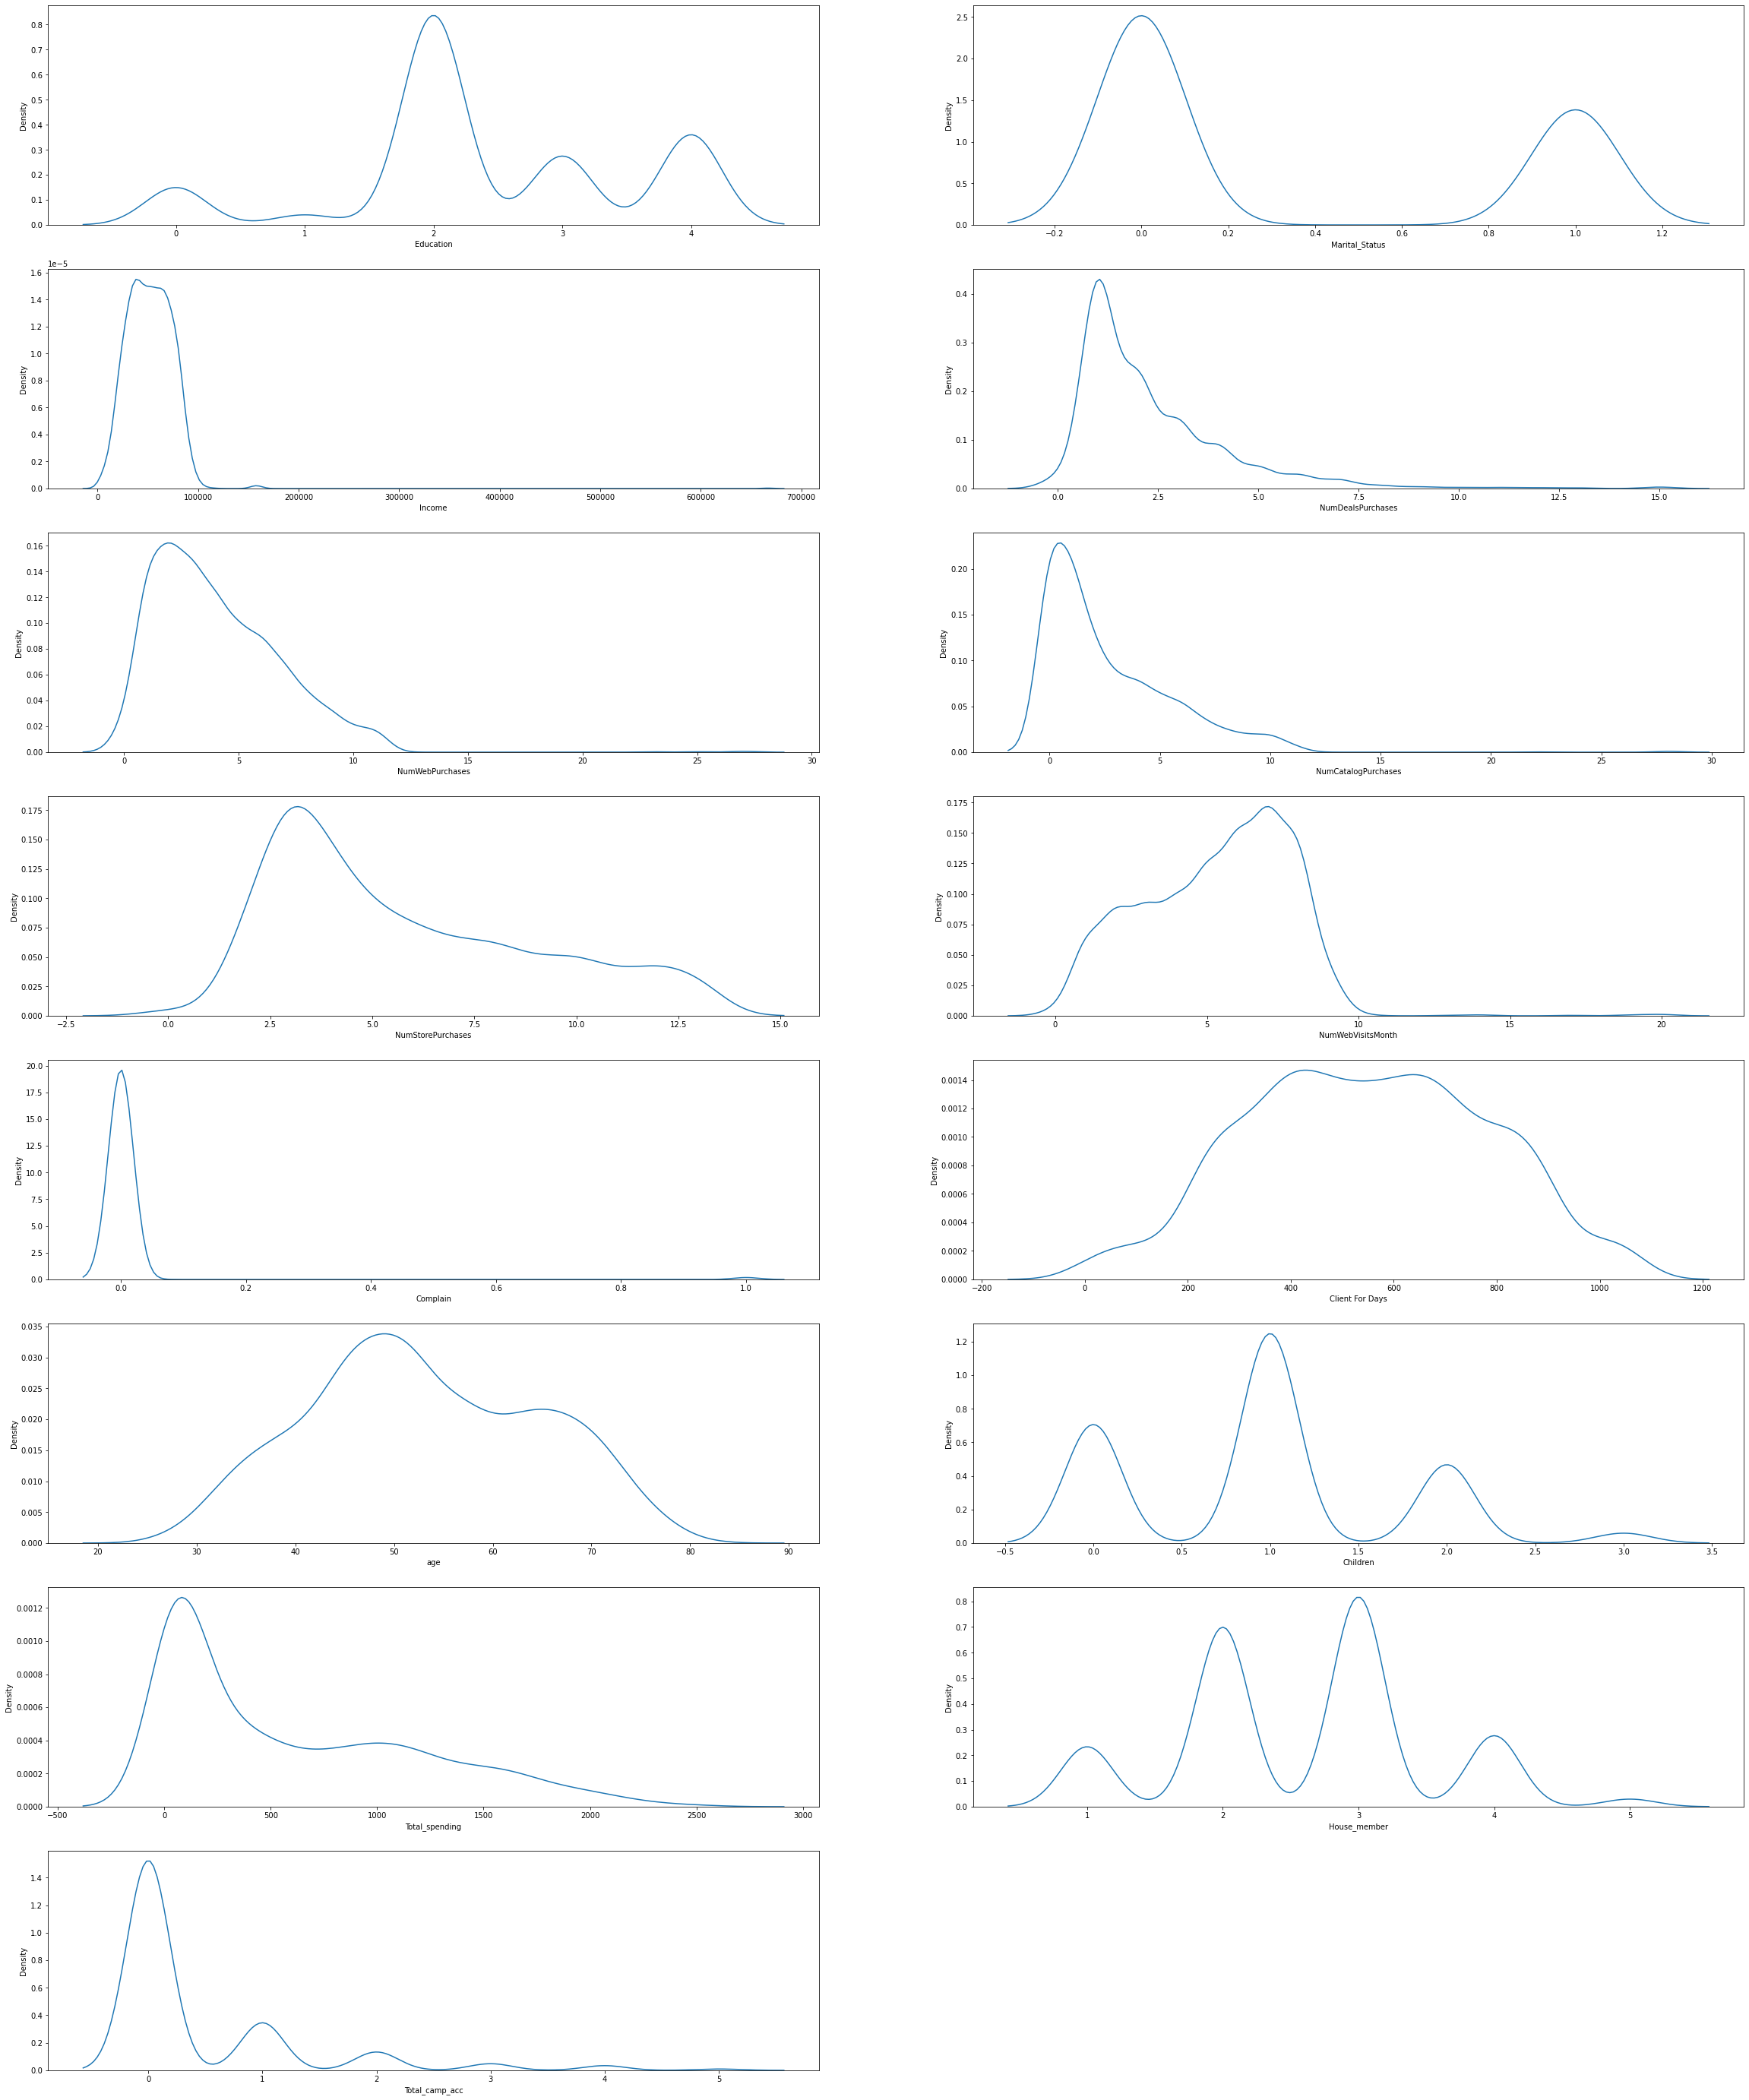

In [23]:
plt.figure(figsize=(40,50))
for i , col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(8,2,i+1)
        sns.kdeplot(df[col],ax = ax)
        plt.xlabel(col)

# CORRELATION

In [24]:
dict = {'NumDealsPurchases':'Dis_purch',
       'NumWebPurchases':'Web_Purch',
       'NumCatalogPurchases':'Catalouge_Purch',
        'NumStorePurchases':'Store_purch',
        'NumWebVisitsMonth':"Web_visit_lst_Month"
       }

df.rename(columns=dict, inplace=True)

In [25]:
feature_corr = df[['Education','age','Income','Total_camp_acc','Total_spending','Dis_purch','Web_Purch','Catalouge_Purch','Store_purch','Client For Days']]

<AxesSubplot:>

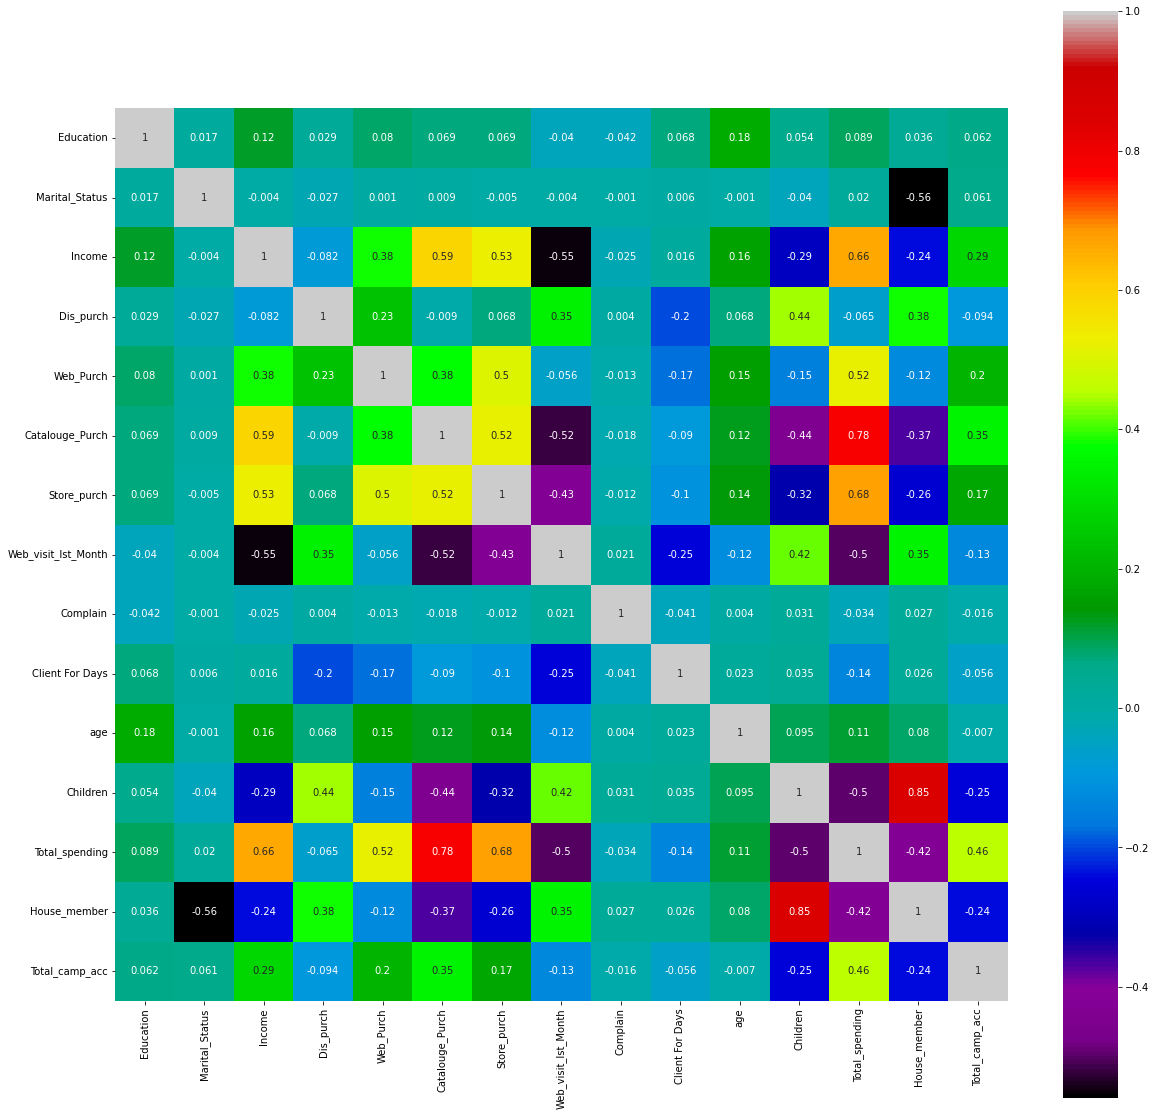

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(np.round(df.corr(),3),annot = True, cmap='nipy_spectral',square=True)

# Feature Selection By Seeing Correlation Plot 

## Creating Dataset For Clustering
* Total Spending
* Income
* Catalouge_Purch
* Store_purch

In [27]:
data_col = df[['Income','Total_spending','Catalouge_Purch','Store_purch']]

In [28]:
# norm_corr = pd.DataFrame(norm_corr, columns=cols)

In [29]:
# norm_corr

## Finding Cluster Number 

* Elbow 

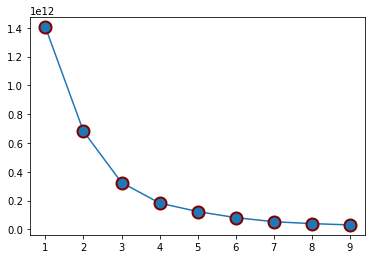

In [30]:
from sklearn.cluster import KMeans

wss= []

for i in range(1,10):
    KM = KMeans(n_clusters=i, init="k-means++")
    KM.fit(data_col)
    wss.append(KM.inertia_)

plt.plot(range(1,10),wss,marker ='o',markersize = 12, markeredgecolor= 'maroon',markeredgewidth = 2, markerfacecolor = None)


In [31]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


* YellowBricks

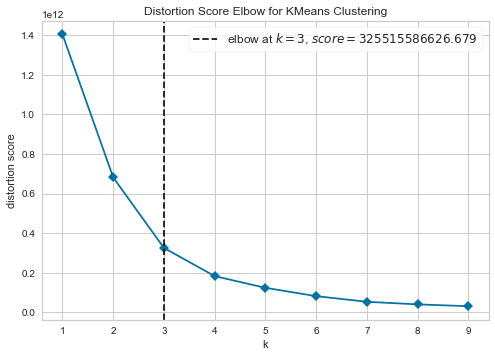

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
KM = KMeans()

visualizer = KElbowVisualizer(KM,k=(1,10),timings=False)
visualizer.fit(data_col)
visualizer.show()

# Fitting Data on KMeans Model

In [33]:
KM = KMeans(n_clusters=4,max_iter=100,random_state=42)
Cluster = KM.fit_predict(data_col)

In [35]:
# df.drop('cluster',axis=1, inplace=True)

In [36]:
df['cluster'] = Cluster

In [37]:
x = df[df['cluster'] == 0].shape[0]
y = df[df['cluster'] == 1].shape[0]
z = df[df['cluster'] == 2].shape[0]
a = df[df['cluster'] == 3].shape[0]
print(x,y,z,a)

811 1 687 738


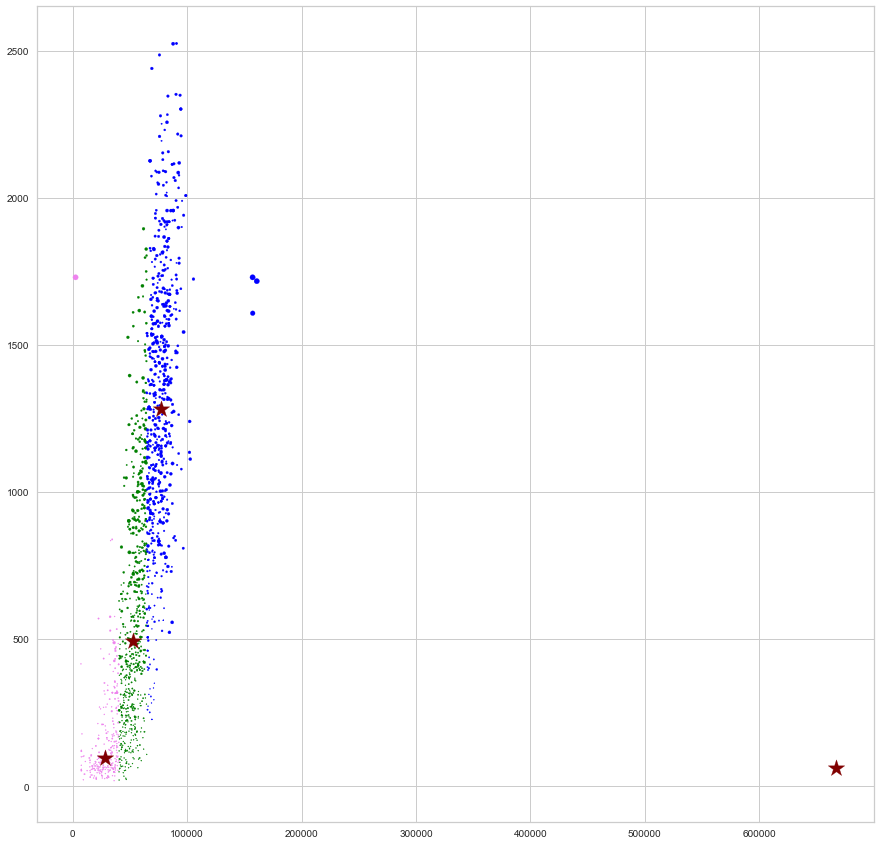

In [64]:
plt.figure(figsize=(15,15))
data_arr = np.array(data_col)
plt.scatter(data_arr[Cluster==0,0],data_arr[Cluster==0,1],data_arr[Cluster==0,2],c='green',label= "Cluster 1")

plt.scatter(data_arr[Cluster==1,0],data_arr[Cluster==1,1],data_arr[Cluster==1,2],c='red',label= "Cluster 3")

plt.scatter(data_arr[Cluster==2,0],data_arr[Cluster==2,1],data_arr[Cluster==2,2],c='blue',label= "Cluster 3")

plt.scatter(data_arr[Cluster==3,0],data_arr[Cluster==3,1],data_arr[Cluster==3,2],c='violet',label= "Cluster 3")

plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], s=300, c='maroon', marker="*",label="Centroids")
plt.show()



# Feature Selection With PCA

## Normalizing Data

In [209]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dis_purch', 'Web_Purch',
       'Catalouge_Purch', 'Store_purch', 'Web_visit_lst_Month', 'Complain',
       'Client For Days', 'age', 'Children', 'Total_spending', 'House_member',
       'Total_camp_acc', 'cluster'],
      dtype='object')

In [210]:
df_pca = df[['Education', 'Marital_Status', 'Income', 'Dis_purch', 'Web_Purch',
       'Catalouge_Purch', 'Store_purch', 'Web_visit_lst_Month', 'Complain',
       'Client For Days', 'age', 'Children', 'Total_spending', 'House_member',
       'Total_camp_acc']]

In [278]:
from sklearn.preprocessing import MinMaxScaler
cols = data_col.columns
scaler = MinMaxScaler()
norm_corr = pd.DataFrame(scaler.fit_transform(df_pca))

In [279]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(norm_corr)

PCA()

Text(0, 0.5, 'cumulative explained variance')

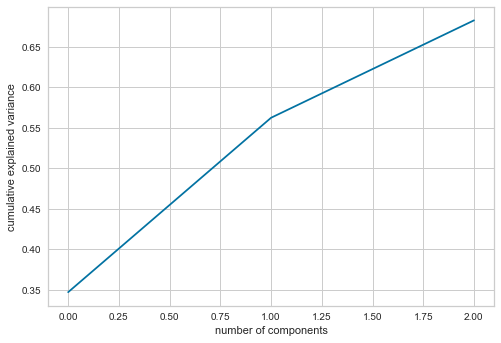

In [308]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [309]:
pca = PCA(n_components=3)
new_pca = pca.fit_transform(norm_corr)
pca_file = pd.DataFrame(new_pca)

In [310]:
col = ['Col_One','Col_Two','Col_Three']
pca_file.columns = col

## Cumulative Plot

Text(0, 0.5, 'cumulative explained variance')

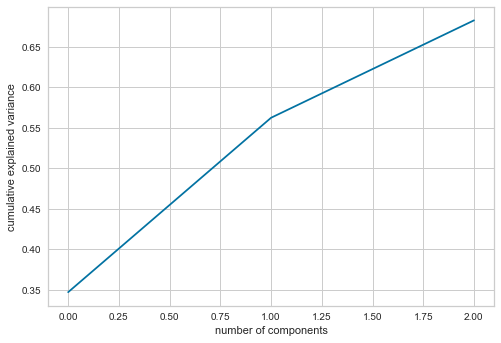

In [311]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Applying DBScan
## Epsilon = 0.7, Min_Sample = 3

In [314]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps= 0.7, min_samples=3).fit(pca_file)
labels = db.labels_
lab = pd.DataFrame(labels)
lab.value_counts()

1    1443
0     794
dtype: int64

## Checking Shihouette_ Score

In [315]:
from sklearn import metrics
print((metrics.silhouette_score(new_pca,labels))*100)

49.53394570190357


## Ploting Data Groups

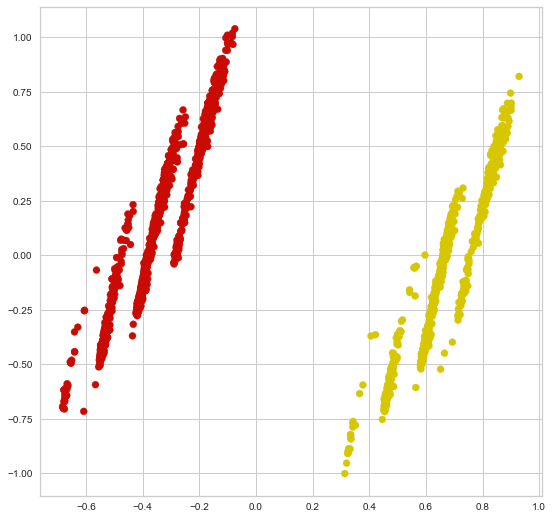

In [317]:
colors = {}
colors[0] = 'y'
colors[1] = 'r'
colors[2] = 'b'
colors[-1] = 'k'
cvec = [colors[label] for label in labels]
# print(cvec)
plt.figure(figsize =(9, 9))
plt.scatter(pca_file['Col_One'], pca_file['Col_Two'],c = cvec)

plt.show()